In [2]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

from sklearn import model_selection

from sklearn.metrics import confusion_matrix

%matplotlib inline 

In [3]:
# all accepted loans from lendingclub
all_accept_df = pd.read_csv('./archive/accepted_2007_to_2018q4.csv')

# all rejected loans from lendingclub
all_reject_df = pd.read_csv('./archive/rejected_2007_to_2018q4.csv')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan_default = all_accept_df['loan_status'].copy()

loan_default[(loan_default=='Fully Paid') | (loan_default=='Current') |
            (loan_default=='Does not meet the credit policy. Status:Fully Paid') |
            (loan_default=='In Grace Period')] = 'Good'

loan_default[loan_default != 'Good'] = 'Bad'

all_accept_df['loan_default'] = loan_default

In [5]:
all_accept_df['loan_default'].value_counts()

Good    1965492
Bad      295209
Name: loan_default, dtype: int64

In [6]:
# convert column to numeric

all_accept_df['term'] = pd.to_numeric(all_accept_df['term'].apply(lambda x: re.findall(r'\d+', str(x))).str[0])
all_accept_df['deferral_term'] = pd.to_numeric(all_accept_df['deferral_term'])

[Text(0, 0.5, 'Loan Amount'), Text(0.5, 0, 'Loan Quality')]

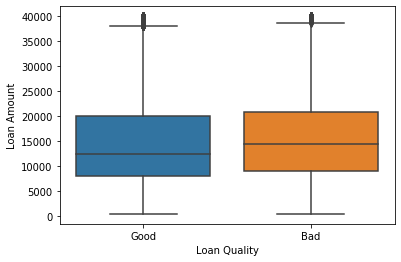

In [7]:
# Box plot good vs bad loans based on loan amount

df = all_accept_df[['loan_default', 'loan_amnt']]

ax = sns.boxplot(x="loan_default", y="loan_amnt", data=df)
ax.set(xlabel='Loan Quality', ylabel='Loan Amount')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Bad loans')

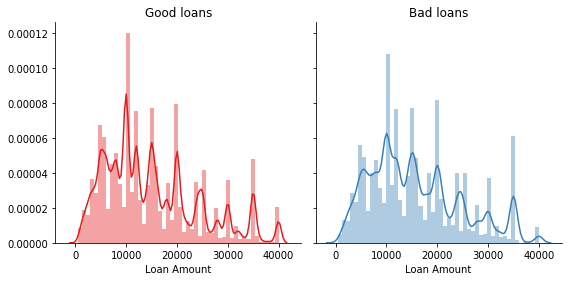

In [8]:
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "loan_amnt")
ax.set_xlabels('Loan Amount')
axes = fcGrid.axes.flatten()
axes[0].set_title("Good loans")
axes[1].set_title("Bad loans")

[Text(0, 0.5, 'Interest Rate'), Text(0.5, 0, 'Loan Quality')]

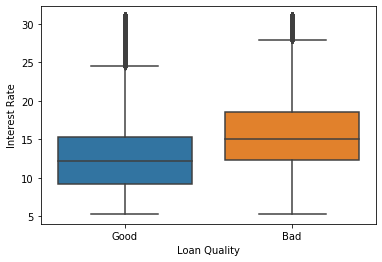

In [129]:
# Box plot good vs bad loans based on loan interest rate

df = all_accept_df[['loan_default', 'int_rate']]

ax = sns.boxplot(x="loan_default", y="int_rate", data=df)
ax.set(xlabel='Loan Quality', ylabel='Interest Rate')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Bad loans')

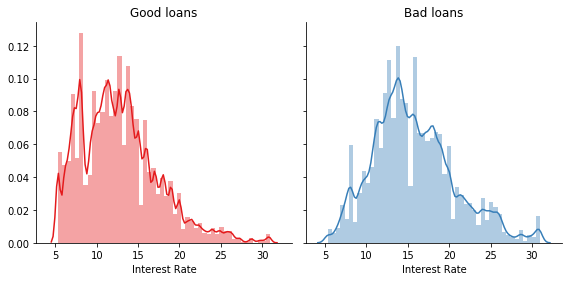

In [130]:
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "int_rate")
ax.set_xlabels('Interest Rate')
axes = fcGrid.axes.flatten()
axes[0].set_title("Good loans")
axes[1].set_title("Bad loans")

[Text(0, 0.5, 'Avg FICO range'), Text(0.5, 0, 'Loan Quality')]

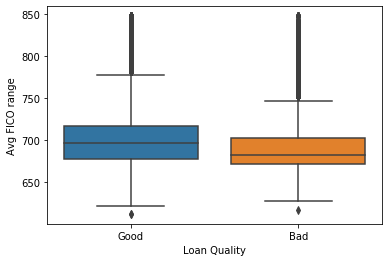

In [131]:
# Box plot good vs bad loans based on Avg FICO range

avg_fico = (all_accept_df['fico_range_low'] + all_accept_df['fico_range_high']) / 2

df = pd.DataFrame({ 'loan_default': all_accept_df['loan_default'], 'avg_fico': avg_fico })

ax = sns.boxplot(x="loan_default", y="avg_fico", data=df)
ax.set(xlabel='Loan Quality', ylabel='Avg FICO range')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Bad loans')

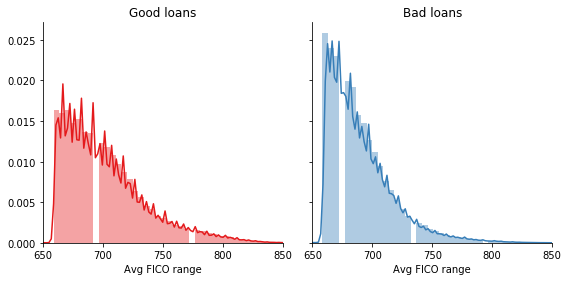

In [132]:
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4, xlim=(650, 850))
ax = fcGrid.map(sns.distplot, "avg_fico")
ax.set_xlabels('Avg FICO range')
axes = fcGrid.axes.flatten()
axes[0].set_title("Good loans")
axes[1].set_title("Bad loans")

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


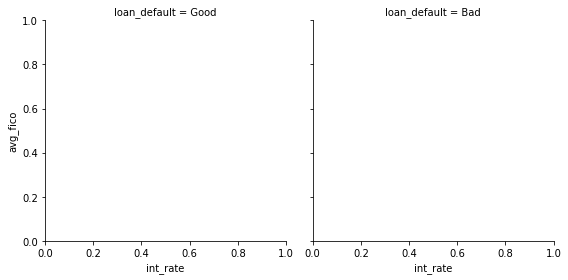

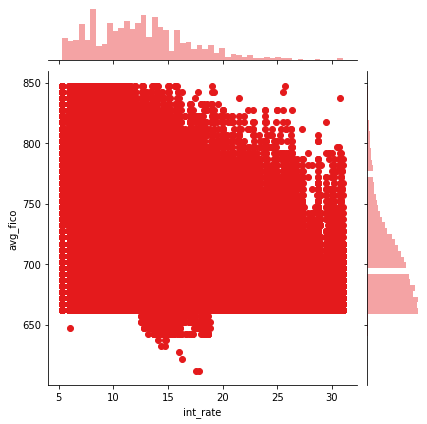

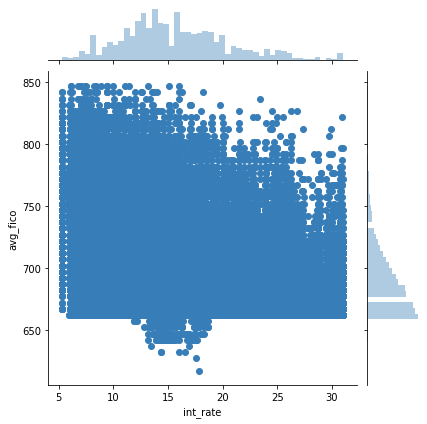

In [11]:
df = pd.DataFrame({ 'loan_default': all_accept_df['loan_default'], 'avg_fico': avg_fico, 'int_rate':all_accept_df['int_rate']})
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4)
fcGrid.map(sns.jointplot, 'int_rate', 'avg_fico')

[Text(0, 0.5, 'Total current balance of all accounts'),
 Text(0.5, 0, 'Loan Quality')]

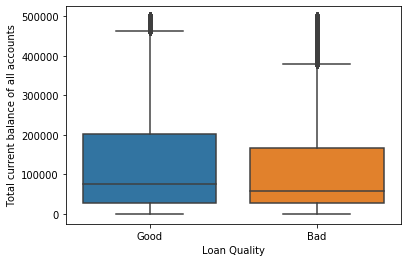

In [133]:
# Box plot good vs bad loans based on tot_cur_bal

df = all_accept_df[['loan_default', 'tot_cur_bal']]
df = df[df['tot_cur_bal'] < 500000]

ax = sns.boxplot(x="loan_default", y="tot_cur_bal", data=df)
ax.set(xlabel='Loan Quality', ylabel='Total current balance of all accounts')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Bad loans')

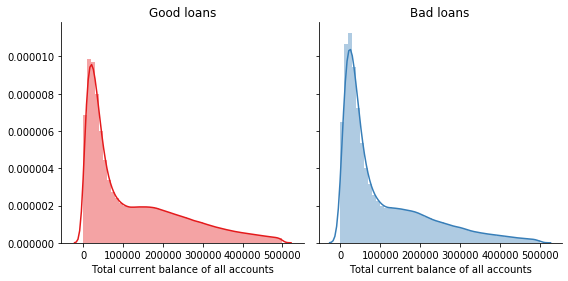

In [134]:
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "tot_cur_bal")
ax.set_xlabels('Total current balance of all accounts')
axes = fcGrid.axes.flatten()
axes[0].set_title("Good loans")
axes[1].set_title("Bad loans")

[Text(0, 0.5, 'Debt to Income ratio'), Text(0.5, 0, 'Loan Quality')]

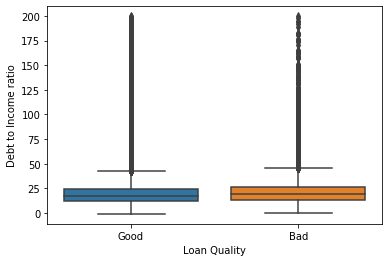

In [135]:
df = all_accept_df[['loan_default', 'dti']]
df = df[df['dti'] < 200]

ax = sns.boxplot(x="loan_default", y="dti", data=df)
ax.set(xlabel='Loan Quality', ylabel='Debt to Income ratio')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Bad loans')

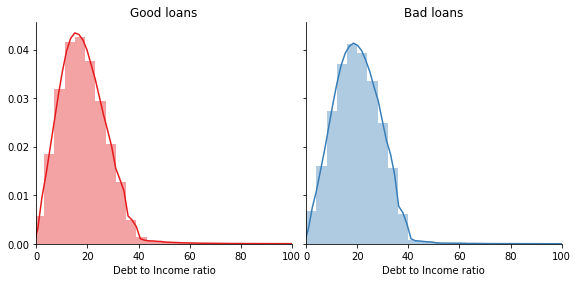

In [136]:
# Box plot good vs bad loans based on dti

df = all_accept_df[['loan_default', 'dti']]
df = df[df['dti'] < 200]
fcGrid = sns.FacetGrid(df, col='loan_default', hue="loan_default", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "dti")
ax.set(xlim=(0, 100))
ax.set_xlabels('Debt to Income ratio')
axes = fcGrid.axes.flatten()
axes[0].set_title("Good loans")
axes[1].set_title("Bad loans")

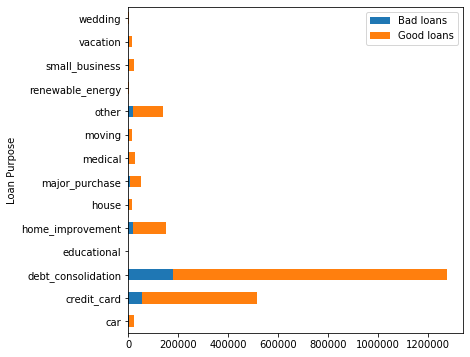

In [9]:
df = all_accept_df\
            .groupby('purpose').agg({'loan_default':'value_counts'})\
            .unstack()\
            .plot\
            .barh(stacked=True, figsize=(6, 6))

df.set_ylabel('Loan Purpose')
df.legend(["Bad loans", "Good loans"])

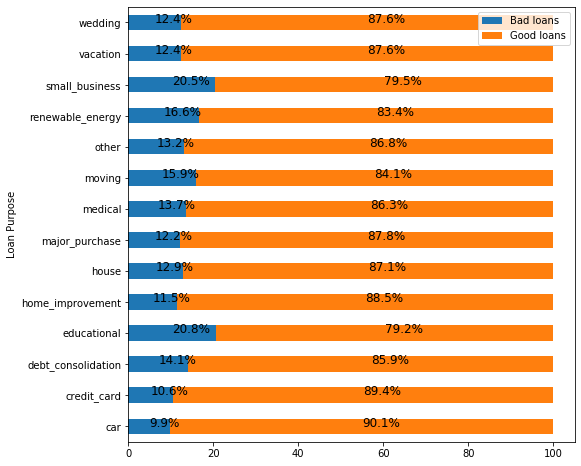

In [10]:
df = all_accept_df.groupby('purpose').agg({'loan_default':'value_counts'})
df = df.groupby(level=[0]).apply(lambda x: 100 * x / float(x.sum()))

ax = df.unstack().plot.barh(stacked=True, figsize=(8, 8))
ax.set_ylabel('Loan Purpose')
ax.legend(["Bad loans", "Good loans"])

values = df.values.round(1)

for i,rec in enumerate(ax.patches):    
    if i < 14:
        index = i*2 + 1
    else:
        index = (i - 14) * 2
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
            '{0}%'.format(values[index][0]), fontsize=12, color='black')

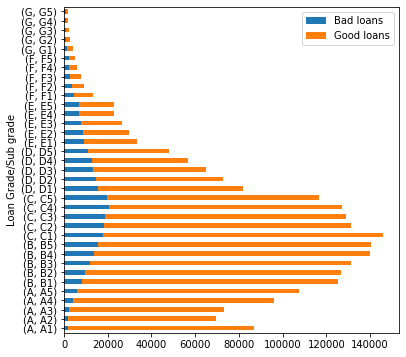

In [11]:
df = all_accept_df.groupby(['grade', 'sub_grade']).agg({'loan_default':'value_counts'})
df = df.groupby(level=[0, 1]).apply(lambda x: 100 * x / float(x.sum()))
#df.values
df.head()

df = all_accept_df\
            .groupby(['grade', 'sub_grade']).agg({'loan_default':'value_counts'})\
            .unstack()\
            .plot\
            .barh(stacked=True, figsize=(6, 6))

df.set_ylabel('Loan Grade/Sub grade')
df.legend(["Bad loans", "Good loans"])

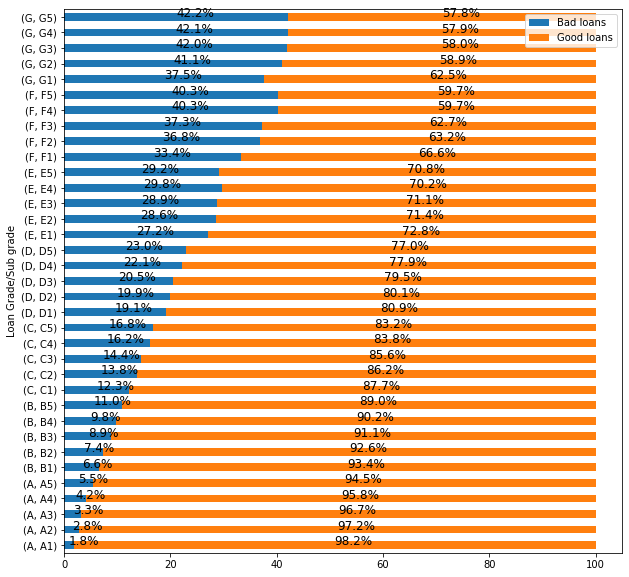

In [14]:
df = all_accept_df.groupby(['grade', 'sub_grade']).agg({'loan_default':'value_counts'})
df = df.groupby(level=[1, 0]).apply(lambda x: 100 * x / float(x.sum()))

ax = df.unstack().plot.barh(stacked=True, figsize=(10, 10))
ax.set_ylabel('Loan Grade/Sub grade')
ax.legend(["Bad loans", "Good loans"])

values = df.values.round(1)

for i,rec in enumerate(ax.patches):
    if i < 35:
        index = i*2 + 1
    else:
        index = (i - 35) * 2
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
            '{0}%'.format(values[index][0]), fontsize=12, color='black')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Interest Rate')

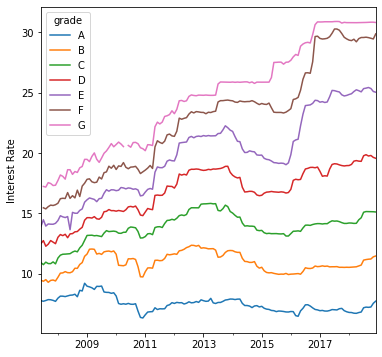

In [107]:
df = all_accept_df[['grade', 'issue_d', 'int_rate']]
df['issue_d'] = pd.to_datetime(df['issue_d'])
df.dropna(inplace=True)

df = df.groupby(['grade', 'issue_d']).agg({'int_rate':'mean'}).reset_index()

df = df.pivot(index='issue_d', columns='grade', values='int_rate')

ax = df.plot(figsize=(6, 6))
ax.set_xlabel('')
ax.set_ylabel('Interest Rate')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

  grade    issue_d  loan_default
0     A 2007-06-01             1
1     A 2007-07-01             1
2     A 2007-08-01             2
3     A 2007-09-01             2
4     A 2007-10-01             2


Text(0, 0.5, 'Rate of rise in loan defaults by grade')

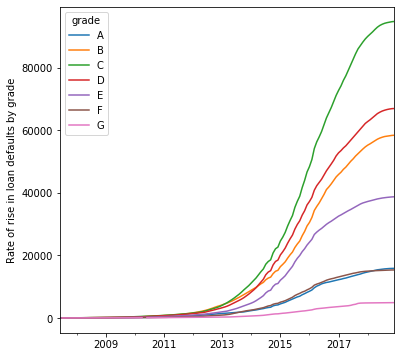

In [16]:
df = all_accept_df[['grade', 'issue_d', 'loan_default']]

df['loan_default'] = df['loan_default'].apply(lambda x: 0 if x=='Good' else 1)

df['loan_default'] = pd.to_numeric(df['loan_default'])

df['issue_d'] = pd.to_datetime(df['issue_d'])
df.dropna(inplace=True)

df = df.groupby(['grade', 'issue_d']).agg({'loan_default':'sum'})\
            .groupby(level=0).cumsum().reset_index()
print(df.head())

df = df.pivot(index='issue_d', columns='grade', values='loan_default')

ax = df.plot(figsize=(6, 6))
ax.set_xlabel('')
ax.set_ylabel('Rate of rise in loan defaults by grade')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

  grade    issue_d  loan_default
0     A 2007-06-01             7
1     A 2007-07-01            22
2     A 2007-08-01            40
3     A 2007-09-01            47
4     A 2007-10-01            55


Text(0, 0.5, 'Rate of rise in allocations of loans by grade')

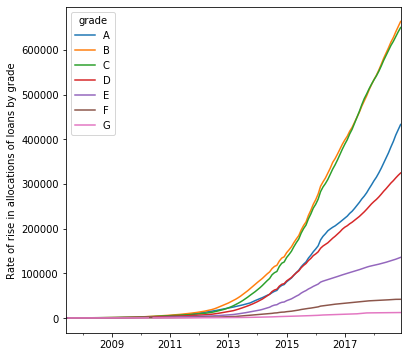

In [17]:
df = all_accept_df[['grade', 'issue_d', 'loan_default']]

df['loan_default'] = df['loan_default'].apply(lambda x: 1 if x=='Good' else 1)

df['loan_default'] = pd.to_numeric(df['loan_default'])

df['issue_d'] = pd.to_datetime(df['issue_d'])
df.dropna(inplace=True)

df = df.groupby(['grade', 'issue_d']).agg({'loan_default':'sum'})\
            .groupby(level=0).cumsum().reset_index()
print(df.head())

df = df.pivot(index='issue_d', columns='grade', values='loan_default')

ax = df.plot(figsize=(6, 6))
ax.set_xlabel('')
ax.set_ylabel('Rate of rise in allocations of loans by grade')

Text(0.5, 1.0, 'Loan Quality - Bad')

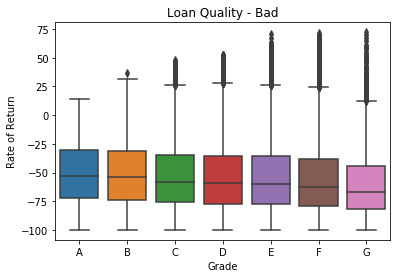

In [101]:
all_accept_df['Rate_of_Return'] = ((all_accept_df['total_rec_prncp'] + all_accept_df['total_rec_int'] - all_accept_df['loan_amnt']) / all_accept_df['loan_amnt']) * 100

df = all_accept_df[['grade', 'Rate_of_Return', 'loan_status']]
df = df[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')]
df = df.sort_values(by=['grade'])
df = df.drop(['loan_status'], axis=1)
df.dropna(inplace=True)

ax = sns.boxplot(x="grade", y="Rate_of_Return", data=df)
ax.set_ylabel('Rate of Return')
ax.set_xlabel('Grade')
ax.set_title('Loan Quality - Bad')

Text(0.5, 1.0, 'Loan Quality - Good')

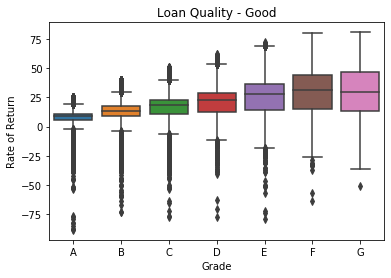

In [103]:
all_accept_df['Rate_of_Return'] = ((all_accept_df['total_rec_prncp'] + all_accept_df['total_rec_int'] - all_accept_df['loan_amnt']) / all_accept_df['loan_amnt']) * 100

df = all_accept_df[['grade', 'Rate_of_Return', 'loan_status']]
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')]
df = df.sort_values(by=['grade'])
df = df.drop(['loan_status'], axis=1)
df.dropna(inplace=True)

ax = sns.boxplot(x="grade", y="Rate_of_Return", data=df)

ax.set_ylabel('Rate of Return')
ax.set_xlabel('Grade')
ax.set_title('Loan Quality - Good')